In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import run_model, plot_exponential_growth, analyze_agi_arrival, calculate_doubling_time
from model_params_ai_rd import start_task_length, agi_task_length, doubling_time, shift, current_best_date

print("Loaded libraries")

Loaded libraries


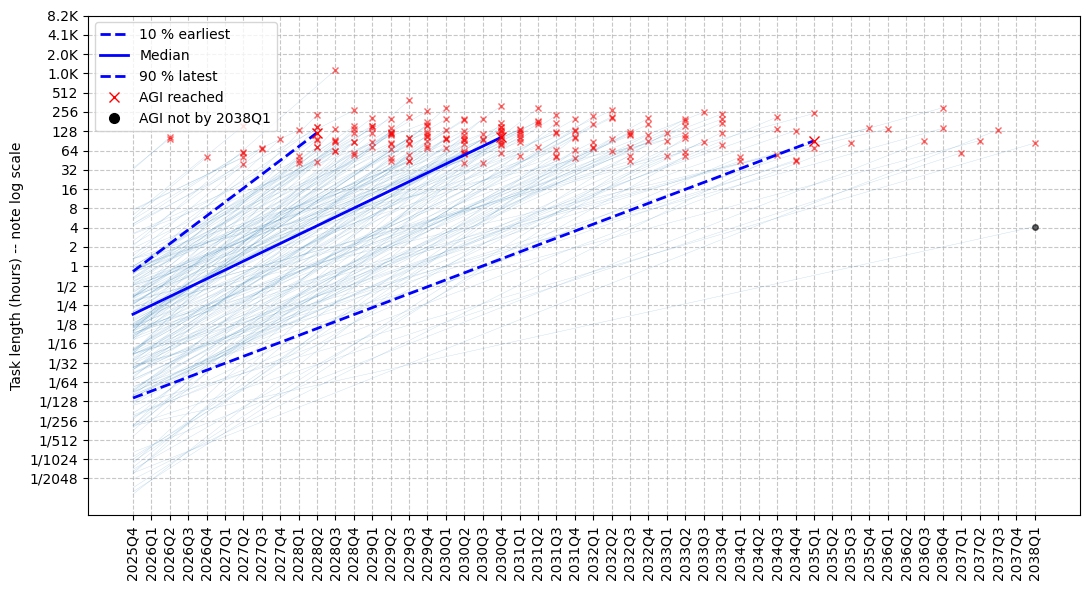

In [2]:
plot_exponential_growth(
    doubling_time_days=doubling_time,
    start_hours=start_task_length,
    start_date=current_best_date,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=49,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)
# TODO: Add compute bend
# TODO: Use AI R&D automation to add superexponential

In [3]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=current_best_date, cores=4)
print('\n\n')
analyze_agi_arrival(samples)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:22<00:00, 4428.67it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1695.52it/s]


...Collected!
{1: 432,
 5: 733,
 10: 926,
 20: 1213,
 30: 1458,
 40: 1691,
 50: 1933,
 60: 2206,
 70: 2543,
 80: 3022,
 90: 3761,
 95: 4507,
 99: 6274}

-

{1: '2027 Jan 25',
 5: '2027 Nov 22',
 10: '2028 Jun 03',
 20: '2029 Mar 16',
 30: '2029 Nov 16',
 40: '2030 Jul 08',
 50: '2031 Mar 06',
 60: '2031 Dec 05',
 70: '2032 Nov 06',
 80: '2034 Feb 27',
 90: '2036 Mar 08',
 95: '2038 Mar 23',
 99: '2043 Jan 24'}



## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2026.2
2%: 2026.5
3%: 2026.7
4%: 2026.9
5%: 2027.0
10%: 2027.5
15%: 2028.0
20%: 2028.3
25%: 2028.7
35%: 2029.3
50%: 2030.3
60%: 2031.0
75%: 2032.5
80%: 2033.3
90%: 2035.3
95%: 2037.3


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 1.2 years from now
2%: 1.5 years from now
3%: 1.7 years from now
4%: 1.9 years from now
5%: 2.0 years from now
10%: 2.5 years from now
15%: 3.0 years from now
20%: 3.3 years from now
25%: 3.7 years from now
35%: 4.3 years from now
50%: 5.3 years from now
60%: 6.0 years from now
75%: 7.5 years from now


In [4]:
samples

array([1213.325605  , 2593.54415073, 3584.8681676 , ..., 1820.84323944,
       1797.4767496 , 3843.44040265])